<a href="https://colab.research.google.com/github/codingtoddler/AI_ML/blob/main/TImeSeries_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Time series data such as stock prices are sequence that exhibits patterns such as trends and seasonality. Each data point in a time series is linked to a timestamp which shows the exact time when the data was observed or recorded. Many fields including finance, economics, weather forecasting and machine learning use this type of data. Due to these characteristics we can use Recurrent Neural Networks (RNN) for prediction as they work fine on sequential data.

To demonstrate the same we're going to use stock price data the most popular type of time series data.

1. Importing required libraries
We will import some libraries such as numpy, pandas, matplotlib, yfinance, scikit learn and tensorflow.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN


2. Fetching Data from Yahoo Finance
We are fetching data from yahoo finance using its API yfinance.

values.reshape(-1, 1): reshapes the data to be in a 2D array required for RNN input.
We extract the Close price from the dataset which is commonly used for forecasting in stock prediction models.
values.reshape(-1, 1): reshapes the data into a 2D array for use in the model.

In [2]:
ticker = 'AAPL'
data = yf.download(ticker, start="2020-01-01", end="2025-01-01")
data = data['Close'].values.reshape(-1, 1)

/tmp/ipython-input-3603964004.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


3. Normalizing the Data
Normalizing data between 0 and 1 prevents large values from dominating smaller ones making training more efficient, improving model stability and convergence especially for deep learning models.

MinMaxScaler: is used to normalize the stock price data to a range between 0 and 1.
scaler.fit_transform(data): Fits the scaler to the dataset and scales all values accordingly.

In [3]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

4. Preparing the Data for Time Series
We will create a function to create a dataset for the training of our RNN model.

create_dataset is a function that generates the input data (X) and target data (y). It slides a window of length time_step (60) over the stock prices and stores the next price as the target.
The X array is reshaped into a 3D array as required by the SimpleRNN layer: [samples, time steps, features].

In [4]:
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data)
X = X.reshape(X.shape[0], X.shape[1], 1)

5. Splitting the Data into Training and Testing Sets
We will split the data into training and testing part into the ratio of 80% Training and 20% Testing data.

In [5]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

6. Building the RNN Model
The model which we are using here is a Recurrent Neural Network (RNN). It s used for sequential data modeling such as time series forecasting.

The model is built using SimpleRNN layers.
units=50 defines the number of units (neurons) in each RNN layer.
return_sequences=True in the first RNN layer ensures that the output is fed to the next RNN layer.
Dense(units=1) is the output layer, predicting a single value i.e the next stock price.
The model is compiled using the Adam optimizer and Mean Squared Error loss function.

In [6]:
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(SimpleRNN(units=50, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7. Training the Model
The model is trained on historical data and used for making predictions.

model.fit(X_train, y_train, epochs=20, batch_size=64): Trains the model for 20 epochs using batches of 64 samples at a time.
model.predict(X_test): Generates predictions for the test data.
scaler.inverse_transform(predictions): Converts the predicted values back to the original scale since they were normalized earlier using MinMaxScaler.

In [7]:
model.fit(X_train, y_train, epochs=20, batch_size=64)

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.6626
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0272
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0068
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0023
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0015
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0011
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 9.5199e-04
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 8.2989e-04
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 8.5380e-04
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 7.9057e-04
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 7.3365e-04
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 7.1268e-04
Epoch 13/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 6.7246e-04
Epoch 14/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 7.1519e-04
Epoch 15/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 

8. Evaluating the model
The model’s performance is evaluated using standard error metrics. These metrics provide insights into how well the model's predictions align with actual values.

y_test_unscaled: We will use y_test unscaled data to get accurate results.
mean_squared_error(y_test, predictions): Computes the Mean Squared Error (MSE) which measures the average squared difference between actual and predicted values.
np.sqrt(mse): Computes the Root Mean Squared Error (RMSE) which provides error in the same units as the target variable.
mean_absolute_error(y_test, predictions): Computes the Mean Absolute Error (MAE) which measures the average absolute difference between actual and predicted values.

In [8]:
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

mse = mean_squared_error(y_test_unscaled, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_unscaled, predictions)

print(f"Unscaled Mean Squared Error (MSE): {mse}")
print(f"Unscaled Root Mean Squared Error (RMSE): {rmse}")
print(f"Unscaled Mean Absolute Error (MAE): {mae}")

Unscaled Mean Squared Error (MSE): 189.03418316583367
Unscaled Root Mean Squared Error (RMSE): 13.748970258380577
Unscaled Mean Absolute Error (MAE): 11.408076413472497


These values suggest that while the model is making reasonable predictions we can further fine tune like refining data preprocessing or using more advanced architectures like LSTM or GRU for better accuracy.

9. Visualizing the Results
This visualization compares the actual stock prices with the predicted stock prices helping to assess the model’s performance visually.

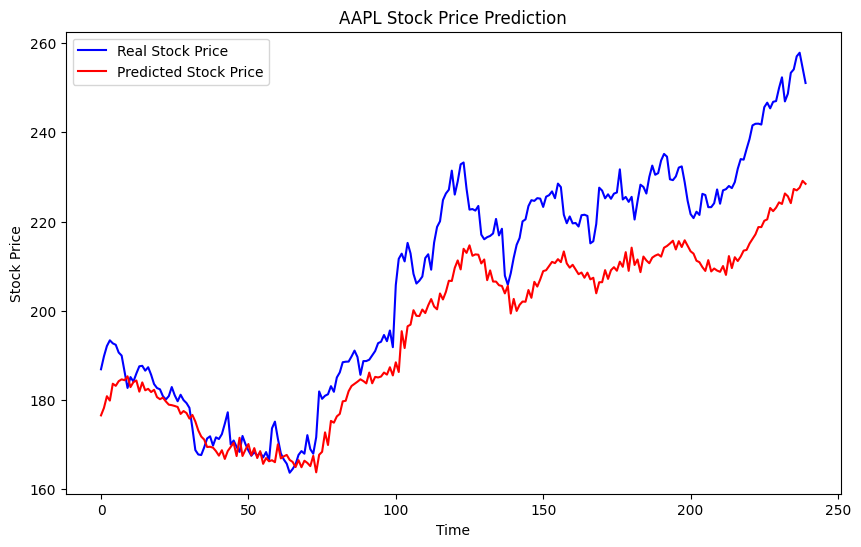

In [9]:
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), color='blue', label='Real Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

The graph shows the performance of a RNN model in predicting Apple (AAPL) stock prices. The blue line represents the actual stock prices from the test data while the red line shows the predicted values. The RNN model successfully captures the underlying trends in the stock price with the predicted values closely following the actual prices. Although minor deviations are observed the overall prediction shows that model effectively learned the temporal patterns in stock data.